# STOCK/CRPYTO PRICE PREDICTION MODEL

## The following code is an example on how to use simple data analysis tolls in order to set up a simple strategy for long and short term financial trading

### We will make use of the programing language python (3.x) which suits nicely for data anlysis

## --> This a very is simplified model for trading. One should always invest just as much money as one can afford to loose and do own studies in advance. 

## Required modules:
- numpy: the code is designed to be vectorized such that the numpy module can be used and calculations performed fast
- pandas: module for illustrative data frames
- yfinance: api module provided by yahoo finance to get current and previous asset prices
- matplotlib: (sub)module(s) for plots
- scipy: (sub)module for statistical and signal analysis
- datetime: (optional)

In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

In [3]:
from model import MODEL
import utils, plotting, statistics

In [4]:
tickers = ['BTC-USD', 'LTC-USD', 'XRP-USD']
model = MODEL(tickers=tickers)

In [5]:
start_date = '2020-01-01'
model.get_data(start=start_date, interval='60m')

[*********************100%***********************]  3 of 3 completed


In [6]:
#edit this:
day_hour = 10
#do not edit below this line:
start_date_range = pd.Timestamp(2020, 1, 1, day_hour)
date_range = utils.create_date_range(start_date=start_date_range)
model.apply_date_filter(date_range)
model.data.tail()

[WARNING]: Filter would result in 1 NaN values.
[USER-INPUT]: Remove NaN values?: y
[INFO]: filter applied.


,BTC-USD,LTC-USD,XRP-USD
Datetime,,,
2020-04-15 10:00:00+01:00,6855.382324,41.248444,0.187341
2020-04-16 10:00:00+01:00,7023.486328,42.673874,0.189330
2020-04-17 10:00:00+01:00,7101.330566,42.428711,0.189191
2020-04-18 10:00:00+01:00,7146.192383,42.837894,0.191020
2020-04-19 10:00:00+01:00,7221.604492,43.487846,0.192905


In [7]:
model.eval_model()

|                                  PRICE MODEL                                   |
|                                  Version 0.3                                   |
|                   Authors: Marco Rosenzweig & Patrick Lorenz                   |
----------------------------------------------------------------------------------
|                   ticker = ['BTC-USD', 'LTC-USD', 'XRP-USD']                   |
|                             start date = 01/01/20                              |
|                              end date = 04/19/20                               |
|                      initial investment per ticker = 200                       |
[INIT]: Initialising model for tickers: ['BTC-USD', 'LTC-USD', 'XRP-USD']
[WARNING]: Ignoring second entry of gradient!
[INIT]: Successfully initialized model.
**********************************************************************************
[TICKER]: BTC-USD
[INFO]: Open position.
[INFO]: No tax paid.
[INFO]: Last entry of "Sell Dat

In [8]:
model.ticker_df['BTC-USD']

,Buy Dates,Sell Dates,Buy Prices,Sell Prices,Trade Reward,Trade Win,Trade Efficiency
0,2020-01-10 10:00:00,2020-01-12 10:00:00,7795.303217,8111.718249,208.118094,8.118094,0.040590
1,2020-01-13 10:00:00,2020-01-15 10:00:00,8165.026612,8723.308437,222.348121,14.230027,0.068375
2,2020-01-21 10:00:00,2020-01-22 10:00:00,8690.157882,8634.341646,220.919996,-1.428125,-0.006423
3,2020-01-25 10:00:00,2020-01-29 10:00:00,8362.045044,9355.800567,247.174395,26.254399,0.118841
4,2020-02-04 10:00:00,2020-02-07 10:00:00,9208.892237,9751.618849,261.741632,14.567238,0.058935
5,2020-02-08 10:00:00,2020-02-09 10:00:00,9819.497716,10041.326909,267.654556,5.912923,0.022591
6,2020-02-11 10:00:00,2020-02-13 10:00:00,9819.107917,10118.744532,275.822213,8.167657,0.030516
7,2020-02-17 10:00:00,2020-02-19 10:00:00,9767.435061,10074.506585,284.493593,8.671381,0.031438
8,2020-02-21 10:00:00,2020-02-24 10:00:00,9704.414941,9712.027397,284.716759,0.223166,0.000784
9,2020-02-28 10:00:00,2020-03-06 10:00:00,8620.244783,9109.852196,300.887928,16.171169,0.056797


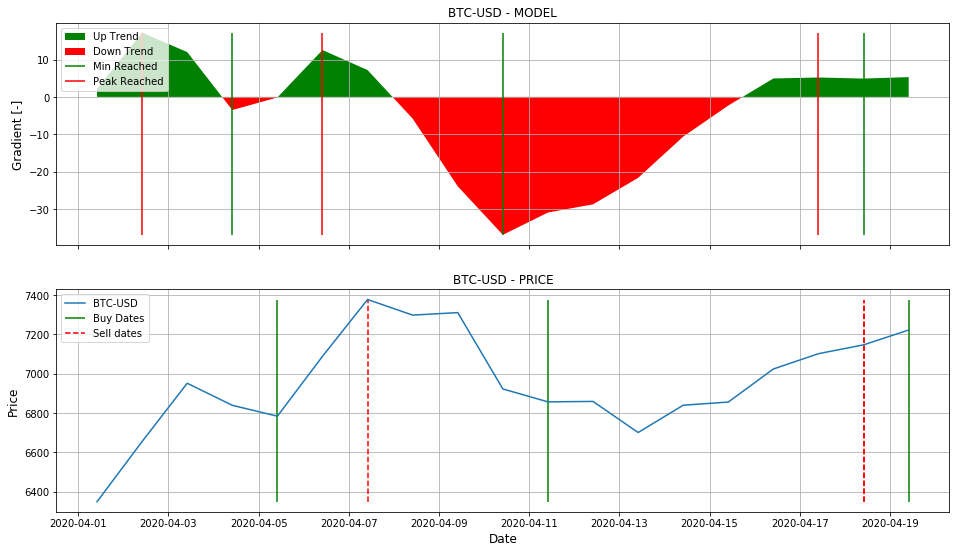

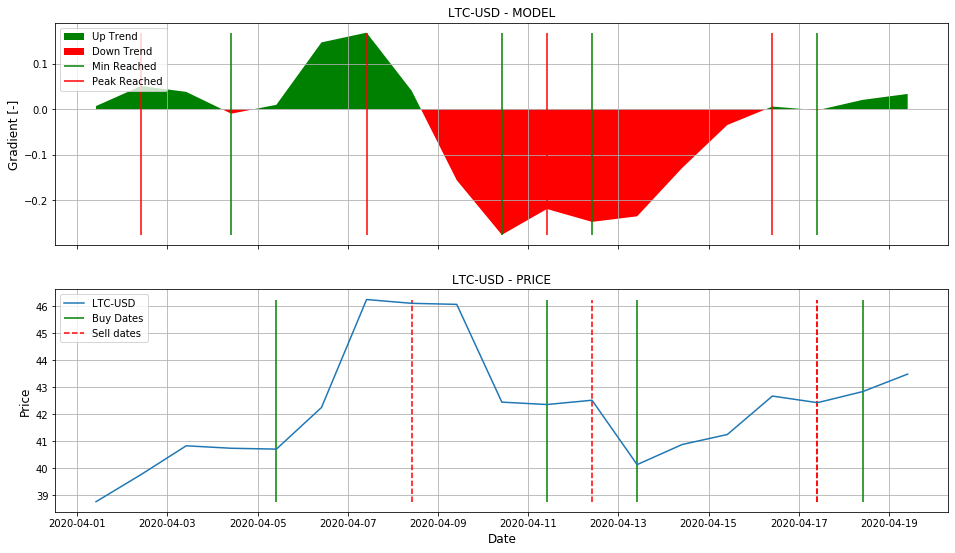

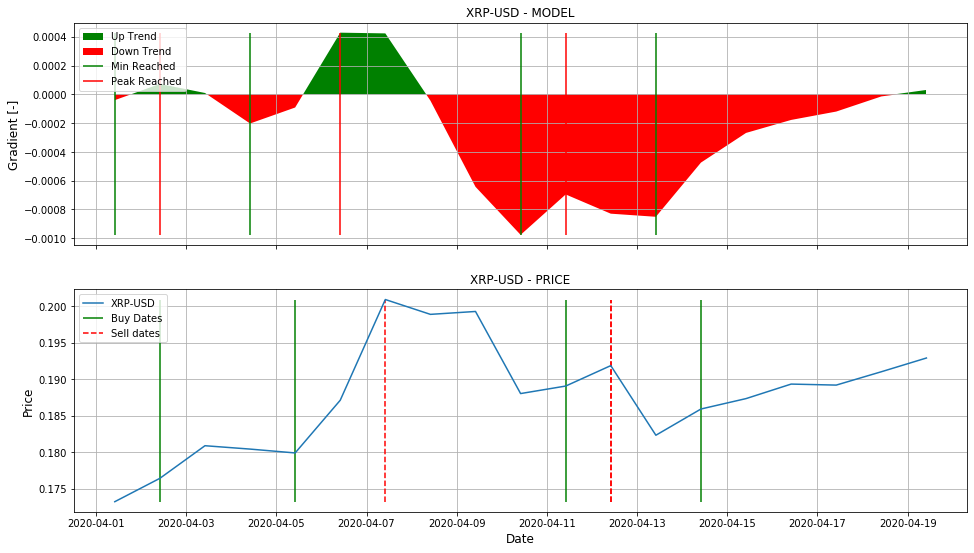

In [9]:
plotting.plot_model(model, tickers='all', plot_from_date='2020-04-01')

In [10]:
imag_model = model.copy_model()

In [11]:
imag_model.append_timedelta(timedelta=1)

[USER-INPUT]: Overwrite existing data? y


In [12]:
imag_model.data.tail(5)

,BTC-USD,LTC-USD,XRP-USD
2020-04-16 10:00:00+01:00,7023.486328,42.673874,0.189330
2020-04-17 10:00:00+01:00,7101.330566,42.428711,0.189191
2020-04-18 10:00:00+01:00,7146.192383,42.837894,0.191020
2020-04-19 10:00:00+01:00,7221.604492,43.487846,0.192905
2020-04-20 10:00:00+01:00,NaN,NaN,NaN


In [13]:
imag_model.comp_break_values()

[INFO]: Compute break values with 30.00% deviation
[INFO]: Current ticker: BTC-USD
[INFO]: Current ticker: LTC-USD
[INFO]: Current ticker: XRP-USD
[USER-INPUT]: Append breaking values w.r.t smallest tolerances? n
[INFO]: Current values: {'BTC-USD': 7221.6044921875, 'LTC-USD': 43.48784637451172, 'XRP-USD': 0.1929045468568802}
[INFO]: Break values: {'BTC-USD': [7296.709178906376, 7283.710290820438], 'LTC-USD': [43.92272483825433, 43.513939082334], 'XRP-USD': [0.19406197413800652, 0.19275022321938007]}
[INFO]: Tolerances: {'BTC-USD': array([75.10468672, 62.10579863]), 'LTC-USD': array([0.43487846, 0.02609271]), 'XRP-USD': array([ 0.00115743, -0.00015432])}


In [14]:
imag_model._init_model()
imag_model.data.tail(5)

[INIT]: Initialising model for tickers: ['BTC-USD', 'LTC-USD', 'XRP-USD']
[WARNING]: Ignoring second entry of gradient!
[INIT]: Successfully initialized model.
**********************************************************************************


,BTC-USD,LTC-USD,XRP-USD
2020-04-16 10:00:00+01:00,7023.486328,42.673874,0.189330
2020-04-17 10:00:00+01:00,7101.330566,42.428711,0.189191
2020-04-18 10:00:00+01:00,7146.192383,42.837894,0.191020
2020-04-19 10:00:00+01:00,7221.604492,43.487846,0.192905
2020-04-20 10:00:00+01:00,NaN,NaN,NaN


[INFO]: Current ticker: BTC-USD
----------------------------------------------------------------------------------
[INFO]: Result for value: 7192.663912185183
[INFO]: New sell signal was detected for last value: 7192.663912185183.


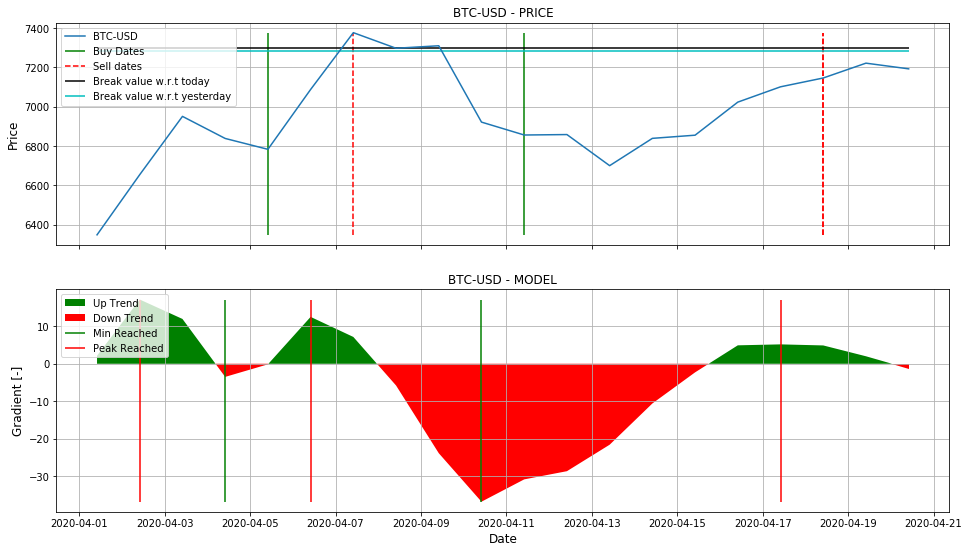

----------------------------------------------------------------------------------
[INFO]: Result for value: 7290.209734863407
[INFO]: New sell signal was detected for last value: 7290.209734863407.


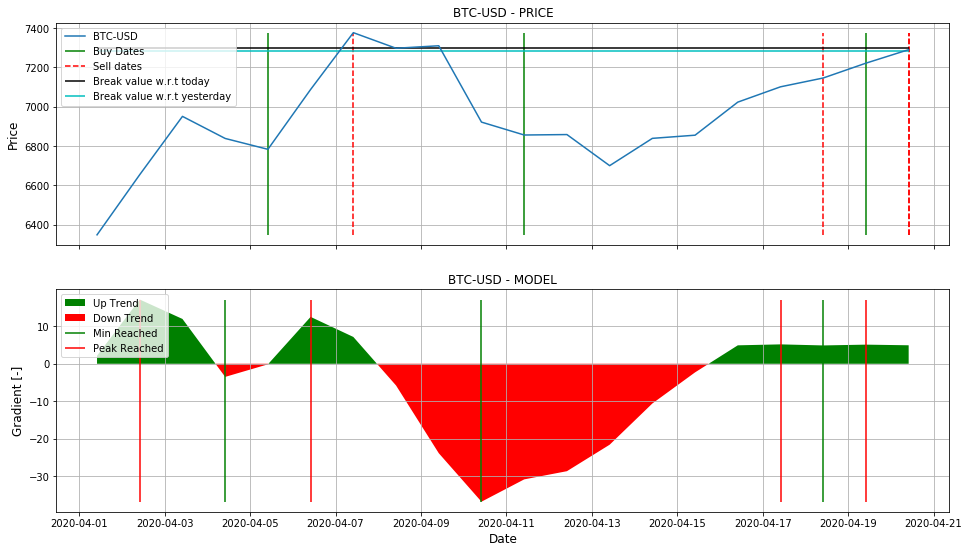

----------------------------------------------------------------------------------
[INFO]: Result for value: 7387.918043642706


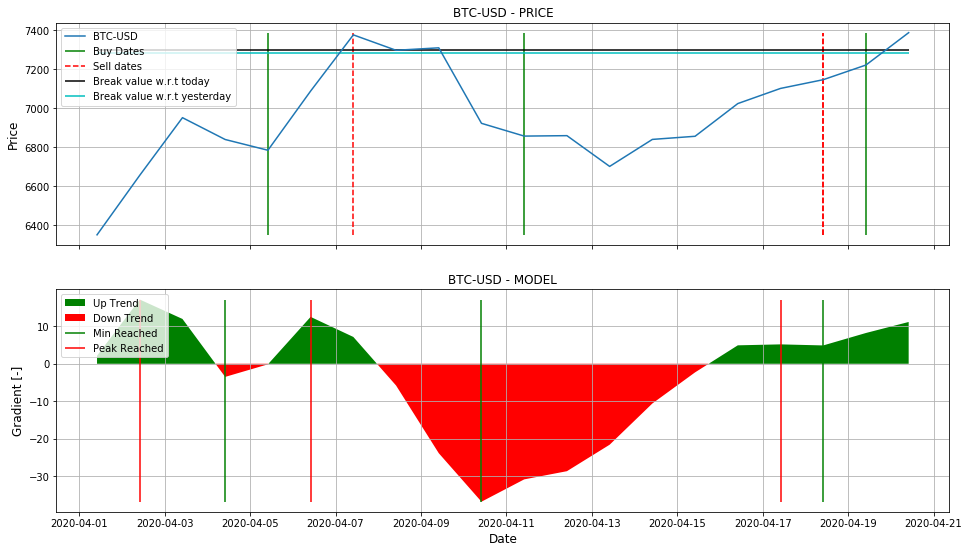

[INFO]: Current ticker: LTC-USD
----------------------------------------------------------------------------------
[INFO]: Result for value: 42.970014843804826
[INFO]: New sell signal was detected for last value: 42.970014843804826.


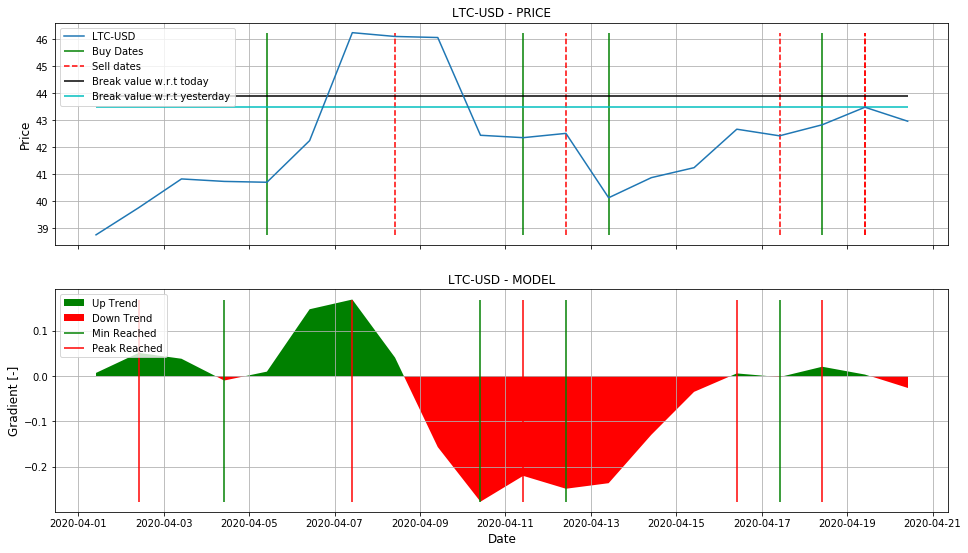

----------------------------------------------------------------------------------
[INFO]: Result for value: 43.718331960294165
[INFO]: New sell signal was detected for last value: 43.718331960294165.


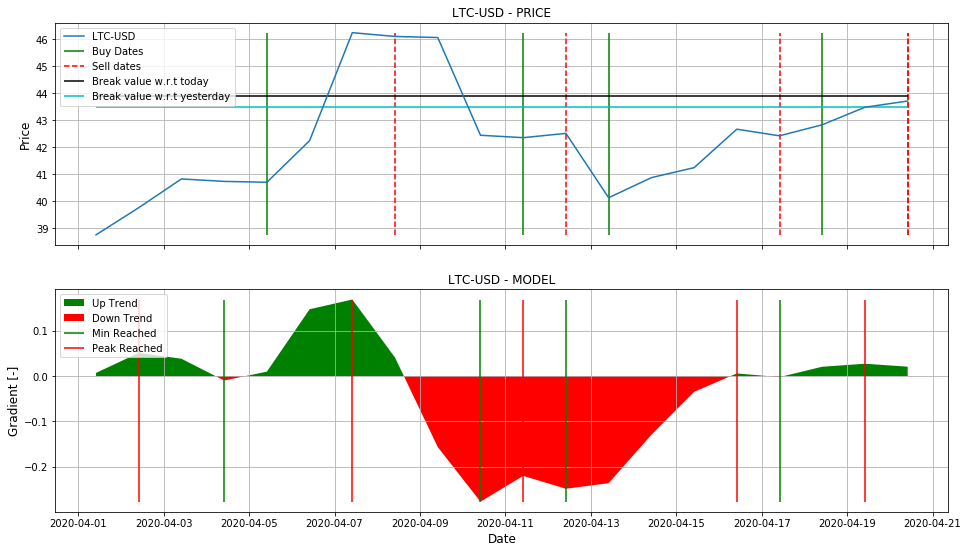

----------------------------------------------------------------------------------
[INFO]: Result for value: 44.47175889873251


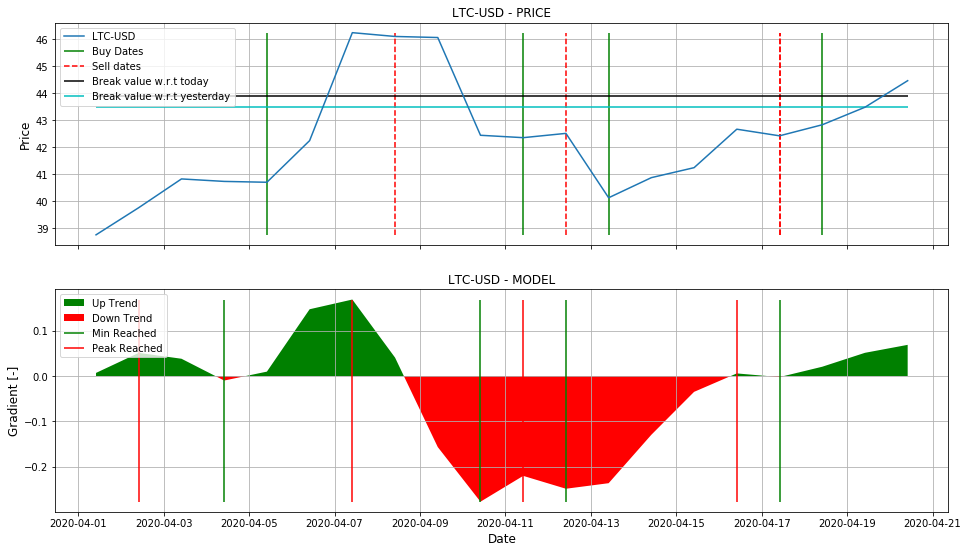

[INFO]: Current ticker: XRP-USD
----------------------------------------------------------------------------------
[INFO]: Result for value: 0.19034084542913782
[INFO]: New sell signal was detected for last value: 0.19034084542913782.


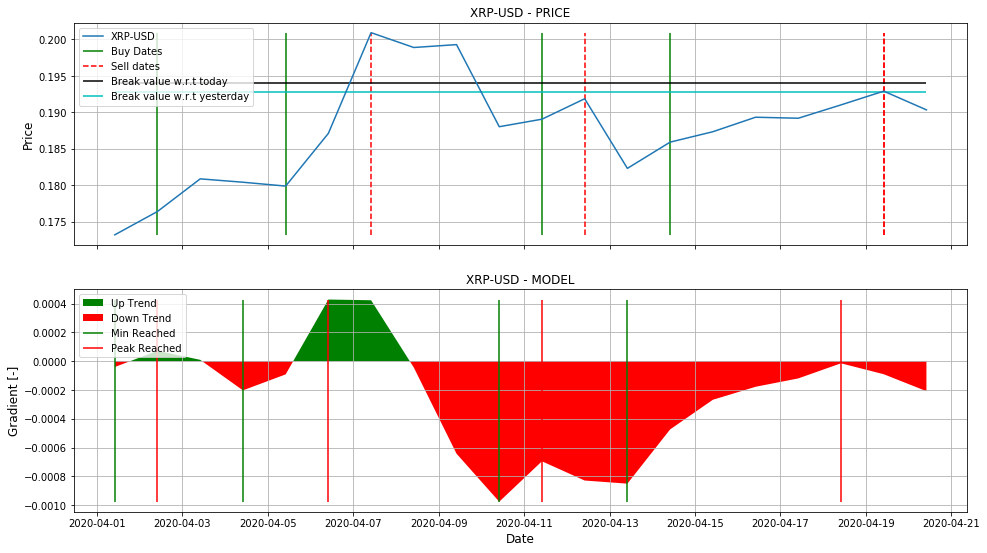

----------------------------------------------------------------------------------
[INFO]: Result for value: 0.1934060986786933
[INFO]: New sell signal was detected for last value: 0.1934060986786933.


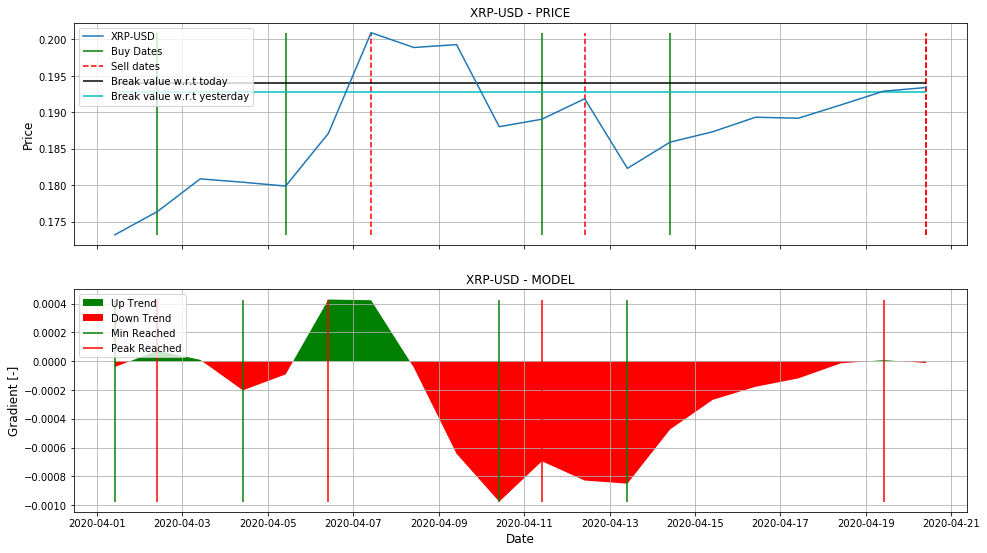

----------------------------------------------------------------------------------
[INFO]: Result for value: 0.1964877488147316


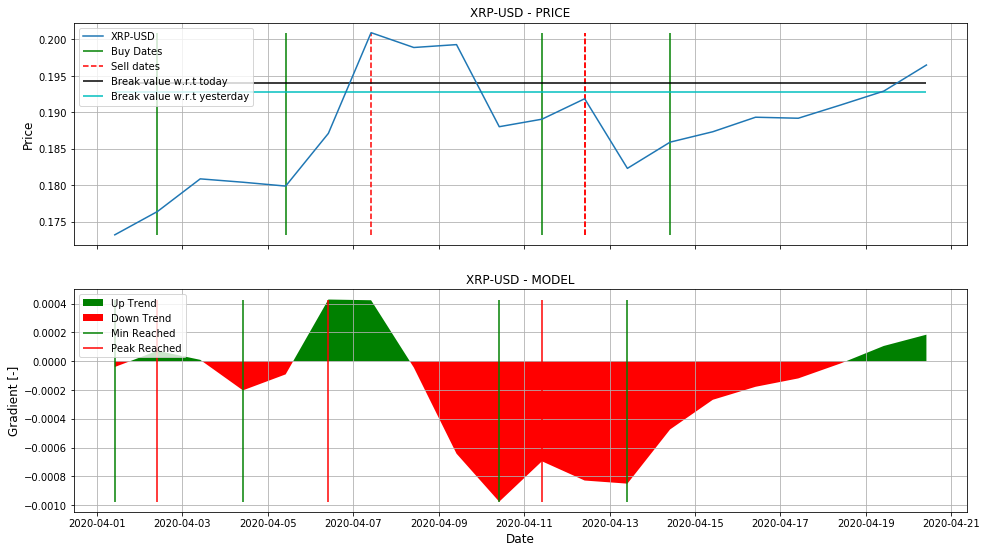

In [15]:
imag_model.show_possibilities(plot_from_date='2020-04-01', switch_axes=True)

[INFO]: Current ticker: BTC-USD
[*********************100%***********************]  1 of 1 completed
[STATS-INFO]: Auto update of tolerances!
[*********************100%***********************]  1 of 1 completed
[STATS-INFO]: Current value: 7232.93310546875!
[STATS-INFO]: New tolerances: [63.77607344 50.77718535]!
[STATS-EVAL]: Probability for tol=50.77719: 43.63%
[STATS-EVAL]: Probability for tol=63.77607: 41.85%
[STATS-EVAL]: Probability between: 1.78%


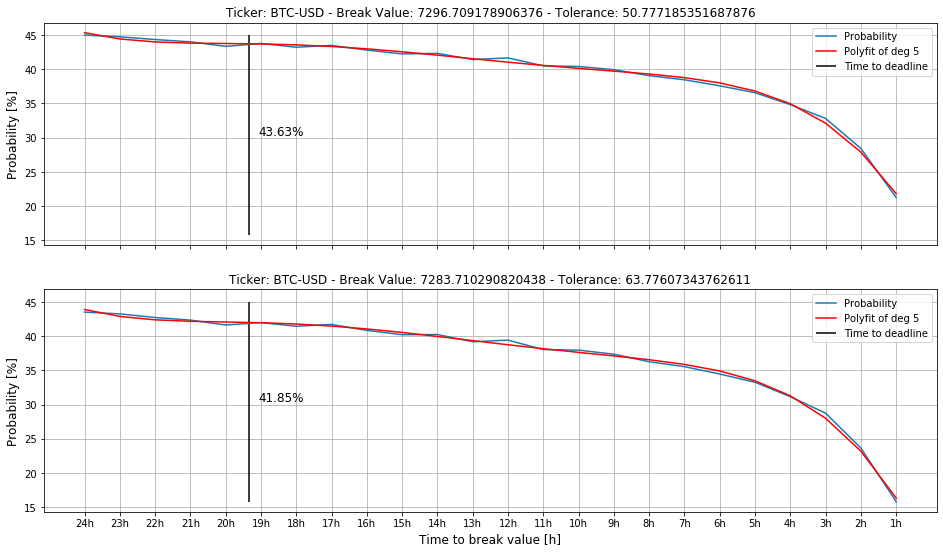

[INFO]: Current ticker: LTC-USD
[*********************100%***********************]  1 of 1 completed
[STATS-INFO]: Auto update of tolerances!
[*********************100%***********************]  1 of 1 completed
[STATS-INFO]: Current value: 43.88121032714844!
[STATS-INFO]: New tolerances: [ 0.04151451 -0.36727124]!
[STATS-EVAL]: Probability for tol=-0.36727: 54.54%
[STATS-EVAL]: Probability for tol=0.04151: 49.54%
[STATS-EVAL]: Probability between: 4.99%


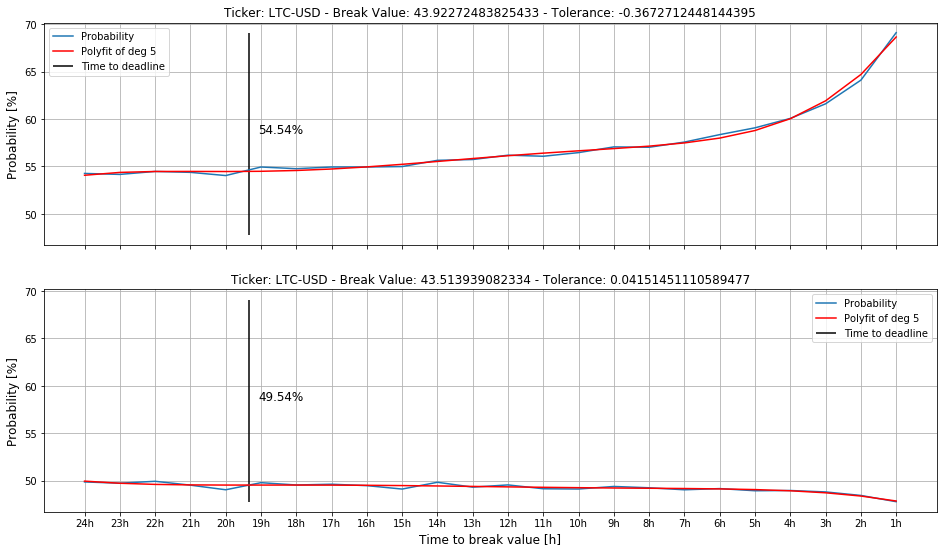

[INFO]: Current ticker: XRP-USD
[*********************100%***********************]  1 of 1 completed
[STATS-INFO]: Auto update of tolerances!
[*********************100%***********************]  1 of 1 completed
[STATS-INFO]: Current value: 0.1938052773475647!
[STATS-INFO]: New tolerances: [ 0.0002567  -0.00105505]!
[STATS-EVAL]: Probability for tol=-0.00106: 52.77%
[STATS-EVAL]: Probability for tol=0.00026: 47.96%
[STATS-EVAL]: Probability between: 4.82%


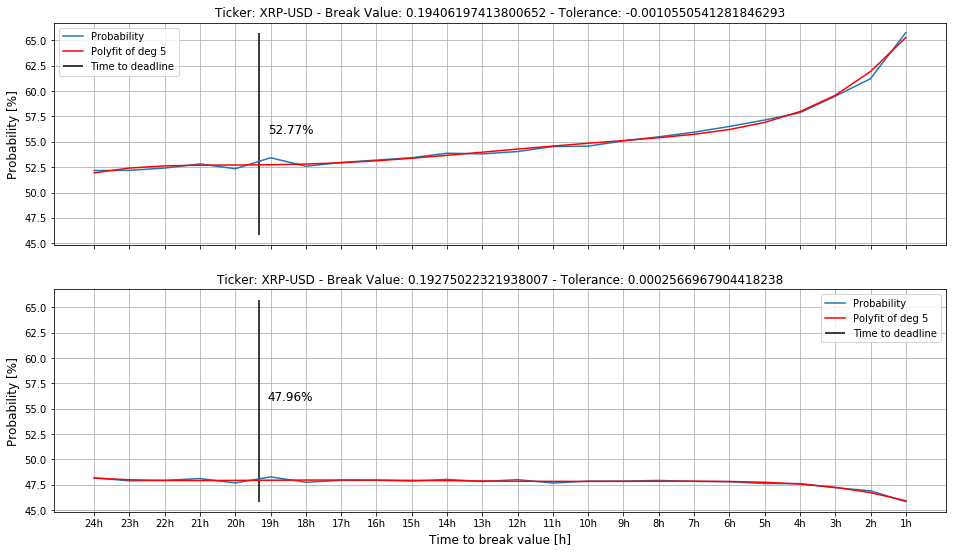

In [16]:
statistics.calc_probs(model=imag_model, auto_update_tolerances=True)

In [17]:
#TODO: Implement this: 
#from model import STATISTICAL_MODEL
#stat_model = STATISTICAL_MODEL(imag_model)